# Text Analysis

Projet de Timothé BERNARD

In [44]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import sklearn
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from pprint import pprint
from time import time
import logging

In [26]:
# Chargement des données
data = pd.read_csv('../nlp-labs/tobacco-lab/data/Tobacco3482.csv')
data.head(10)

,img_path,label
0,Advertisement/0000136188.jpg,Advertisement
1,Advertisement/0000435350.jpg,Advertisement
2,Advertisement/0000556056.jpg,Advertisement
3,Advertisement/0030048095.jpg,Advertisement
4,Advertisement/0030048989.jpg,Advertisement
5,Advertisement/0030049569.jpg,Advertisement
6,Advertisement/03496270.jpg,Advertisement
7,Advertisement/03567810.jpg,Advertisement
8,Advertisement/03722789.jpg,Advertisement
9,Advertisement/04102204.jpg,Advertisement


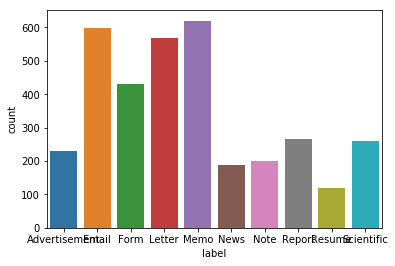

In [27]:
#On affiche un diagramme d'apparation de chaque catégorie dans notre set de données

g = sns.countplot(data['label'],orient='h')
g


([<matplotlib.patches.Wedge at 0x7fcb0b32fc50>,
 [Text(1.0764005673946186, 0.22663145967085654, 'Advertisement'),
  Text(0.634947489671787, 0.898243667029997, 'Email'),
  Text(-0.3397299458968406, 1.046223477016708, 'Form'),
  Text(-1.0308809870045412, 0.3837764852522143, 'Letter'),
  Text(-0.8309107807359369, -0.720824024611275, 'Memo'),
  Text(-0.13955989979815026, -1.0911109175369524, 'News'),
  Text(0.24408190918058426, -1.0725782123513237, 'Note'),
  Text(0.6606130738421147, -0.8795398607617921, 'Report'),
  Text(0.9205687546155593, -0.6021238809626789, 'Resume'),
  Text(1.0696416655506011, -0.2566450999301099, 'Scientific')])

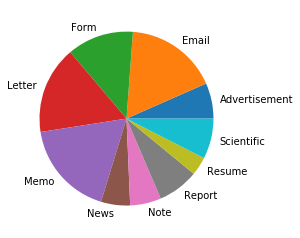

In [28]:
#Comme la fréquence d'apparition me parait, inégale, je choisie d'afficher un camembert pour mieux 
# se rendre compte des disparité
unique, counts = np.unique(data['label'],return_counts=True)
plt.pie(counts,labels=unique)

In [36]:
list_files = []
for root, dirs, files in os.walk("./data", topdown=False):
    for name in files:
        if ".txt" in os.path.join(root, name) :
            list_files.append(os.path.join(root, name))

list_text = []
for file in list_files:
    file_object = open(file,'r')
    list_text.append(file_object.read())
    
dict_data = {}
for i in range(len(data['img_path'])):
    dict_data['../nlp-labs/tobacco-lab/data/'+data['img_path'][i].replace('jpg','txt')] = data['label'][i] 
X = []
y = []
for i in dict_data:
    file_object = open(i,"r")
    X.append(file_object.read())
    file_object.close()
    y.append(dict_data[i])
    

In [31]:
# On split nos données
X_train, X_test,y_train,  y_test = train_test_split(X,y, test_size=0.2)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size = 0.25)

In [40]:
#On définit deux fonctions pour entrainer et tester notre modele bayesien

def vectorizer(X_train, max_features = 2000):

    vectorizer = CountVectorizer(max_features=max_features)
    vectorizer.fit(X_train)
    
    return vectorizer

def model_NB_train(X_train,y_train,vectorizer):
    # On vectorize nos tweets
    X_train_counts = vectorizer.transform(X_train)
    
    # On entraine nos Naives Bayes
    model = MultinomialNB()
    model.fit(X_train_counts,y_train)

    y_pred_train = model.predict(X_train_counts)
   
    print("Evalution (Phase de train) : ",accuracy_score(y_train,y_pred_train))
    return model

def model_test(model,vectorizer,X_test,y_test):
    
    X_test_counts = vectorizer.transform(X_test)

    y_pred_test = model.predict(X_test_counts)
    
    print("Evalution (Phase de test) : ",accuracy_score(y_test,y_pred_test),"\n")
    print(classification_report(y_test,y_pred_test))
    print(confusion_matrix(y_test,y_pred_test))
    return model

vectorizer = vectorizer(X_train, 2000)
model = model_NB_train(X_train,y_train, vectorizer)
model_test(model,vectorizer,X_test,y_test)


Evalution (Phase de train) :  0.8362068965517241
Evalution (Phase de test) :  0.6987087517934003 

               precision    recall  f1-score   support

Advertisement       0.65      0.68      0.67        38
        Email       0.82      0.95      0.88       119
         Form       0.65      0.77      0.71        88
       Letter       0.70      0.66      0.68       107
         Memo       0.72      0.69      0.70       134
         News       0.65      0.76      0.70        37
         Note       0.50      0.24      0.33        45
       Report       0.43      0.42      0.42        55
       Resume       0.96      1.00      0.98        26
   Scientific       0.72      0.60      0.66        48

    micro avg       0.70      0.70      0.70       697
    macro avg       0.68      0.68      0.67       697
 weighted avg       0.69      0.70      0.69       697

[[ 26   3   2   1   0   3   2   1   0   0]
 [  0 113   0   4   1   0   0   1   0   0]
 [  3   1  68   2   5   0   5   3   0   1]

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:


def MLP_train(layer_size,activation, vectorizer, X_train, y_train):
    model = MLPClassifier(10,activation=activation,solver='adam')
    X_train_counts = vectorizer.transform(X_train)
    model.fit(X_train_counts,y_train)
    
    y_pred_train = model.predict(X_train_counts)
    
    print("Evalution (Phase de train) : ",accuracy_score(y_train,y_pred_train))

    
    return model

model = MLP_train(5,'tanh',vectorizer,X_train,y_train)
model_test(model,vectorizer,X_test,y_test)

In [ ]:
# On fait le grid search pour trouver la meilleure configuration
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')


pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('mlp', MLPClassifier()),
])


parameters = {
    'vect__max_df': (0.25, 0.5, 0.75, 1.0),
    'mlp__activation': ('logistic','tanh','relu'),
    'mlp__hidden_layer_sizes' : (2,10)
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=2)

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
pprint(parameters)
t0 = time()
grid_search.fit(X_test, y_test)
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['vect', 'mlp']
parameters:
{'mlp__activation': ('logistic', 'tanh', 'relu'),
 'mlp__hidden_layer_sizes': (2, 10),
 'vect__max_df': (0.25, 0.5, 0.75, 1.0)}
Fitting 3 folds for each of 24 candidates, totalling 72 fits


/home/tbernard/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.3min
